# CIF Finder
* Downloads CIF files and XRD peaks from Materials Project.
* To be added in the future: OQMD, ICDD, PDF, COD, CCD, ICSD

In [23]:
from analyseSpec import download_matproj_structures_and_xrd

api_key = 'ghyzX1uAW76rp0kL'

# Elements of interest
alloy_elements = ["Co","Fe"]
#alloy_elements = ["Cu", "Ag", "Ni","Co","Fe"]
impurities = ["Cl","O", "N"]

download_matproj_structures_and_xrd(api_key, alloy_elements, impurities)


c:\Users\suhas\anaconda3\envs\autoxrd\lib\site-packages\pymatgen\ext\matproj_legacy.py:166: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


Processing material: Fe7Co (ID: mp-1080603)...
  - Downloading CIF structure...
  - CIF structure saved to Filtered_structures\Fe7Co_mp-1080603.cif.
  - Calculating XRD spectrum...
  - XRD spectrum saved to XRD_spectra\Fe7Co_mp-1080603.csv.
Processing material: Fe11Co5 (ID: mp-601848)...
  - Downloading CIF structure...
  - CIF structure saved to Filtered_structures\Fe11Co5_mp-601848.cif.
  - Calculating XRD spectrum...
  - XRD spectrum saved to XRD_spectra\Fe11Co5_mp-601848.csv.
Processing material: FeCo3 (ID: mp-1225083)...
  - Downloading CIF structure...
  - CIF structure saved to Filtered_structures\FeCo3_mp-1225083.cif.
  - Calculating XRD spectrum...
  - XRD spectrum saved to XRD_spectra\FeCo3_mp-1225083.csv.
Processing material: FeCo9 (ID: mp-1096987)...
  - Downloading CIF structure...
  - CIF structure saved to Filtered_structures\FeCo9_mp-1096987.cif.
  - Calculating XRD spectrum...
  - XRD spectrum saved to XRD_spectra\FeCo9_mp-1096987.csv.
Processing material: Fe3Co (ID: m

# Put Mat Project XRDs into a dict

In [26]:

from analyseSpec import matproject_xrd_to_dict

xrd_path = "XRD_spectra"
# Call the function and store the resulting dictionary
matproject_data_dict = matproject_xrd_to_dict(xrd_path)


# Display one element of the dictionary
matproject_data_dict[list(matproject_data_dict.keys())[0]]



,2Theta,Intensity,hkl
0,13.265466,0.257029,"[{'hkl': (2, 0, 0), 'multiplicity': 2}]"
1,14.474496,0.272635,"[{'hkl': (0, 0, 1), 'multiplicity': 2}]"
2,16.663099,7.189614,"[{'hkl': (2, 0, -1), 'multiplicity': 2}]"
3,22.309720,2.267376,"[{'hkl': (2, 0, 1), 'multiplicity': 2}]"
4,23.476234,0.034134,"[{'hkl': (1, 1, 0), 'multiplicity': 4}]"
...,...,...,...
152,87.740543,0.088617,"[{'hkl': (12, 0, 0), 'multiplicity': 2}]"
153,88.365814,0.004392,"[{'hkl': (10, 2, 0), 'multiplicity': 4}]"
154,88.641840,0.075191,"[{'hkl': (8, 2, -4), 'multiplicity': 4}]"
155,88.745570,0.009326,"[{'hkl': (6, 2, 3), 'multiplicity': 4}]"


In [34]:
def find_common_peaks(main_df, dataframes_dict):
    common_peaks = {}
    
    for key, df in dataframes_dict.items():
        common = []
        
        for value in df['2Theta']:
            # Check if there's a value in 2θ (degree) that's within 2 degrees of the current 2Theta value
            mask = (main_df['2θ (degree)'] >= value - 0.05) & (main_df['2θ (degree)'] <= value + 0.05)
            if mask.any():
                common.append(value)
                
        common_peaks[key] = common
        
    return common_peaks

# Usage:
# common_peaks = find_common_peaks(your_main_df, dataframes_dict)


In [37]:
m = find_common_peaks(all_peaks.head(5),matproject_data_dict)
all_peaks.head(5)

,2θ (degree),Peak Intensity,Prominence,FWHM,Peak Intensity Normalized,Prominence Normalized
41,19.12,1740.39,1447.701818,0.32,100.000000,100.000000
81,38.12,204.75,209.191212,0.32,11.764604,14.449883
98,51.60,126.81,132.181818,0.40,7.286298,9.130459
71,32.68,55.43,62.483916,0.36,3.184918,4.316076
5,6.92,93.61,57.377669,0.28,5.378679,3.963362


In [36]:
m
# Display only the elements that are not empty
m_not_empty = {k: v for k, v in m.items() if v}

print("Common peaks found in the dataframes:")
for key, value in m_not_empty.items():
    print(f"{key}: {value}")





Common peaks found in the dataframes:
Fe(Co5N4)2_mp-1247046: [38.16920606527007, 51.63057092406468]
Fe10CoN8_mp-1247037: [51.55893259097278]
Fe2Co3N4_mp-1246230: [51.64358284184942]
Fe2Co3O10_mp-778217: [38.14577521521933]
Fe3(CoN)8_mp-1246348: [38.09344949083479]
Fe3Co5O16_mp-771370: [32.6421479729051]
Fe3Co7O20_mp-775826: [38.1123346826702]
Fe7(CoO6)2_mp-1225378: [32.72725472887462]
FeCo3O8_mp-1178259: [51.55249439117236, 51.5622373294152, 51.64548557291749, 51.649132754101416]
FeCo3O8_mp-753474: [38.090973549153794]
FeCo3O8_mp-771245: [19.099750009913546]
FeCo3_mp-1007852: [51.61197670412849]
FeCo9_mp-1096987: [51.58331060429085]
FeCoO4_mp-761526: [32.658841117523366]


# XRD Background Removal

In [2]:
# Code to be added here

# Peak Detection

* Applies a Savitzky-Golay smoothing filter followed by scipy find_peaks
* You can change the smoothing and find_peak parameters inside analyseSpec.py

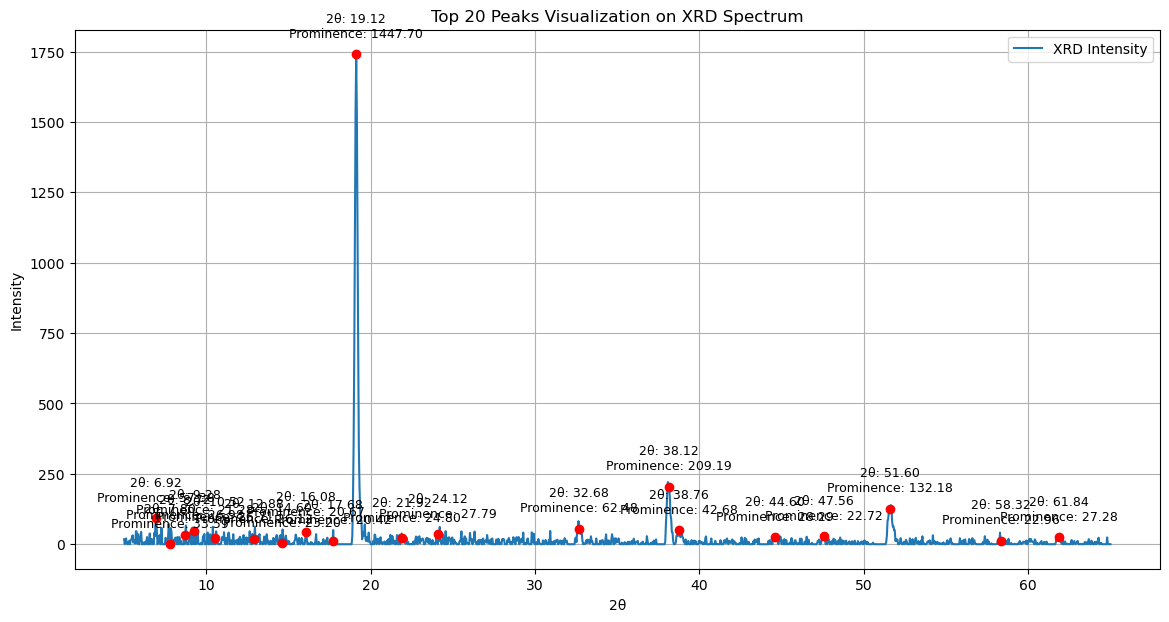

In [27]:
from analyseSpec import extract_peak_properties_advanced
import pandas as pd

#Co-0.714-Fe-0.286	= id 04292

filename =  r"input_data\230704-19\230704-19_050_4-05_id04292_s2_temp50_time1_bckSub.csv"
df = pd.read_csv(filename)
df = df[["X","Backsub_Y"]]

all_peaks = extract_peak_properties_advanced(df, visualize=True)
all_peaks = all_peaks.sort_values(by=['Prominence'],ascending=False)


### Table of peaks sorted by prominence
Output by the above function

In [28]:
all_peaks

,2θ (degree),Peak Intensity,Prominence,FWHM,Peak Intensity Normalized,Prominence Normalized
41,19.12,1740.39,1447.701818,0.32,100.000000,100.000000
81,38.12,204.75,209.191212,0.32,11.764604,14.449883
98,51.60,126.81,132.181818,0.40,7.286298,9.130459
71,32.68,55.43,62.483916,0.36,3.184918,4.316076
5,6.92,93.61,57.377669,0.28,5.378679,3.963362
...,...,...,...,...,...,...
2,6.00,35.28,3.325758,0.08,2.027132,0.229727
17,9.92,0.00,3.260816,0.12,0.000000,0.225241
14,9.12,0.00,3.209837,0.08,0.000000,0.221719
3,6.32,0.00,3.140583,0.12,0.000000,0.216936


# Scherrer Equation: grain size

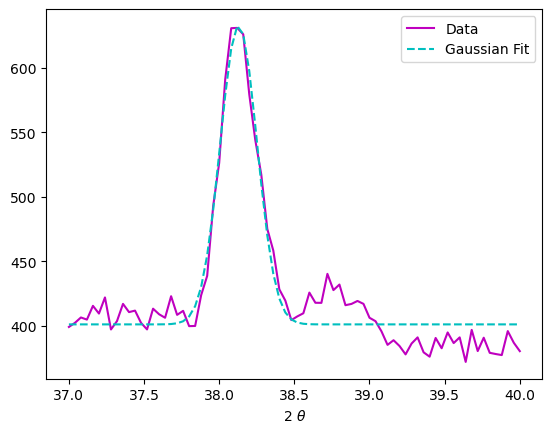

{'y_shift': 401.29822757680944,
 'amplitude': 70.98618816649967,
 'mean': 38.129402558309884,
 'sigma': 0.12230088653090614,
 'covariance_matrix': array([[ 3.87653698e+00, -2.52100208e+00, -3.83610875e-11,
         -2.89560389e-03],
        [-2.52100208e+00,  7.66384631e+00,  1.16617635e-10,
          8.80263581e-03],
        [-3.83610875e-11,  1.16617635e-10,  2.38432527e-05,
         -5.53124409e-11],
        [-2.89560389e-03,  8.80263581e-03, -5.53124409e-11,
          2.60061430e-05]]),
 'scherrer_width': 29.18547851618462,
 'R2': 0.9372679349828117,
 'RMSE': 14.812248940283535,
 'FWHM_degrees': 0.2879965791280334}

In [3]:
from analyseSpec import scherrer_analysis

#filename = r"input_data\test.csv"
df = pd.read_csv(filename)

# Example usage on the previously loaded data
results = scherrer_analysis(df, (37, 40), visualize=True)
results


ddd

# Lattice spacing
The input to the function is $\theta$ (in degrees) not $2\theta$!

In [1]:
from analyseSpec import estimate_d_spacing

# Test the function with the example of Si. 
theta_example = 14.2  #2θ value for the 111 peak is 28.4 degrees, so θ is 14.2 degrees
wavelength_example = 1.5406  # Common wavelength for Cu Kα radiation

d_spacing_example = estimate_d_spacing(theta_example, wavelength_example)
d_spacing_example


3.1401418968305226

In [11]:
import powerxrd as xrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def backsub_from_dataframe(input_df):
    # Extract data from the input DataFrame
    x = input_df.iloc[:, 0].values
    y = input_df.iloc[:, 1].values
    
    # Create an instance of xrd.Chart with the data
    chart = xrd.Chart(x, y)
    
    # Get the background subtracted data
    _, backsub_y = chart.backsub()
    
    # Combine the data and background subtracted data into a new DataFrame
    df = pd.DataFrame({
        'X': x,
        'Y': y,
        'Backsub_Y': backsub_y
    })
    
    return df

# Sample test (assuming you have a DataFrame named 'sample_df' with two columns)
df_2 = backsub_from_dataframe(df)
print(df_2.head())


      X      Y  Backsub_Y
0  5.00  17.68       0.00
1  5.04   0.00       0.00
2  5.08  10.57       4.87
3  5.12  20.76      10.53
4  5.16   5.69       0.00


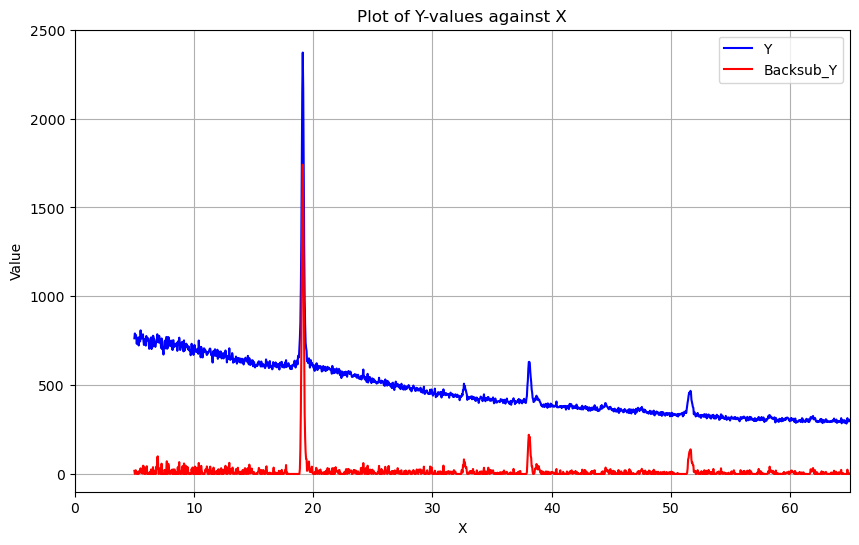

In [37]:
import matplotlib.pyplot as plt

# Sample data for demonstration
# df = pd.DataFrame({
#     'X': [1, 2, 3, 4, 5],
#     'Y1': [5, 3, 4, 2, 3],
#     'Y2': [2, 4, 1, 3, 5]
# })

# Plotting
plt.figure(figsize=(10, 6))

# Plot the values from the second column against the first column
plt.plot(df_2['X'], df.iloc[:, 1], label=df_2.columns[1], color='blue')

# Plot the values from the third column against the first column
plt.plot(df_2['X'], df_2.iloc[:, 2], label=df_2.columns[2], color='red')

# Setting labels, title, legend and grid
plt.xlabel(df.columns[0])
plt.ylabel('Value')
plt.title('Plot of Y-values against X')
plt.ylim(-100,2500)
plt.xlim(0,65)
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import os
folder_path = r"input_data\230704-19"

if not os.path.isdir(folder_path):
        raise ValueError(f"{folder_path} not found")

import glob
    # Get a list of all .xy files in the specified folder
xy_files = glob.glob(f"{folder_path}/*.xy")

xy_files

['input_data\\230704-19\\230704-19_001_1-01_id09450_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_002_1-02_id09462_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_003_1-03_id09479_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_004_1-04_id03286_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_005_1-05_id03317_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_006_1-06_id03318_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_007_1-07_id03353_s3_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_008_1-08_id03345_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_009_1-09_id03383_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_010_1-10_id03408_s3_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_011_1-11_id03413_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_012_1-12_id03418_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_013_1-13_id03450_s2_temp50_time1.xy',
 'input_data\\230704-19\\230704-19_014_1-14_id03579

In [50]:
def truncate_arrays(data_tuple, lower_bound, upper_bound):
    """
    Truncate the first array in the tuple to values > lower_bound and < upper_bound.
    Remove corresponding values from the second array.
    
    Parameters:
    - data_tuple: A tuple of two numpy arrays.
    - lower_bound: Lower boundary for truncation.
    - upper_bound: Upper boundary for truncation.
    
    Returns:
    - A new tuple of truncated arrays.
    """
    
    array1, array2 = data_tuple
    
    # Identify the indices in array1 where the values are > lower_bound and < upper_bound
    indices = np.where((array1 > lower_bound) & (array1 < upper_bound))

    # Extract the corresponding values from both arrays
    truncated_array1 = array1[indices]
    truncated_array2 = array2[indices]

    return (truncated_array1, truncated_array2)

# Displaying the function code
truncate_arrays


<function __main__.truncate_arrays(data_tuple, lower_bound, upper_bound)>

the amplitude is 6.771156551343768*****************


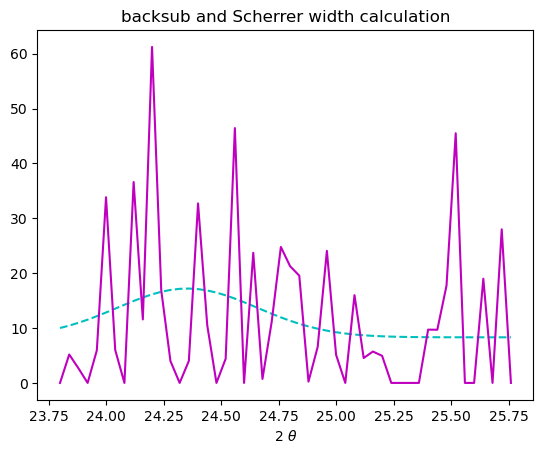

In [26]:
import powerxrd as xrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename =  r"input_data\test.csv"

data = xrd.Data(filename).importfile()
chart = xrd.Chart(*data)

#chart.backsub(tol=1.0,show=True)
max_x, max_yseg, sch_nm, left_end,right_end = chart.SchPeak(xrange=[23.80,25.79],verbose=False,show=True)
plt.xlabel('2 $\\theta$')
plt.title('backsub and Scherrer width calculation')
plt.show()


-Gaussian fit results-
y-shift 12.22332928306697
amplitude 374.12627838753764
mean 19.119912522642522
sigma 0.08864793670139427
covariance matrix 
[[ 7.77305179e+00 -3.66399830e+00 -3.15143214e-12 -5.78780400e-04]
 [-3.66399830e+00  1.11385531e+01  8.92671747e-12  1.75949242e-03]
 [-3.15143214e-12  8.92671747e-12  7.04522557e-07 -1.12908827e-12]
 [-5.78780400e-04  1.75949242e-03 -1.12908827e-12  7.47618490e-07]]
the amplitude is 374.12627838753764*****************
0.9 0.15406 0.0036433737365841093 0.1668534764906579
38.59244887223946 ******************************

SchPeak: Scherrer width calc. for peak in range of [18,21]

FWHM == sigma*2*sqrt(2*ln(2)): 0.208749938295078 degrees
K (shape factor): 0.9
K-alpha: 0.15406 nm 
max 2-theta: 19.12 degrees

SCHERRER WIDTH: 38.59244887223946 nm


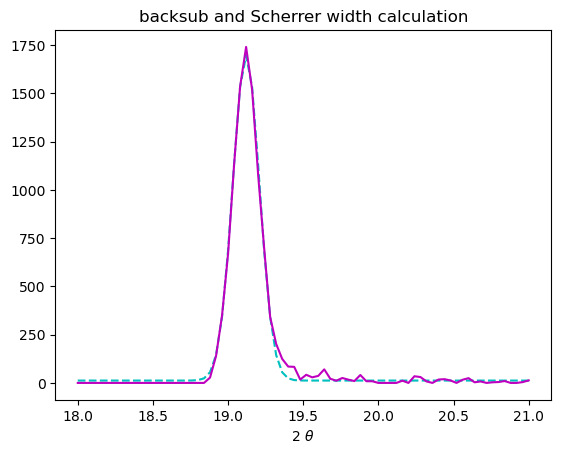

38.59244887223946

In [1]:
import powerxrd as xrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_peak(df, wavelength_range):
    # Extracting x and y from the dataframe
    x = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    # Use the extracted x and y data
    chart = xrd.Chart(x, y)

    # Uncomment below if you want background subtraction
    # chart.backsub(tol=1.0,show=True)

    max_x, max_yseg, sch_nm, left_end, right_end = chart.SchPeak(xrange=wavelength_range, verbose=True, show=True)

    plt.xlabel('2 $\\theta$')
    plt.title('backsub and Scherrer width calculation')
    plt.show()

    return max_x, max_yseg, sch_nm, left_end, right_end

# Usage
filename = r"input_data\test.csv"
data_df = pd.read_csv(filename)
wavelength_range = (37, 40)
max_x, max_yseg, sch_nm, left_end, right_end = analyze_peak(data_df, wavelength_range)
sch_nm

In [23]:
a

(32.64, 81.93, 35.015852799570055, 32.393799161946696, 32.95541521851241)

In [31]:
def scherrer(K,lmda,beta,theta):
    '''Scherrer equation'''
    # print('Scherrer Width == K*lmda / (FWHM*cos(theta))')
    return K*lmda / (beta*np.cos(theta))    #tau

In [32]:
scherrer(0.9,0.154,0.208,0.1669)

0.6757358442289291